## Phase 2

### Header
#### Course Name: 
**Data Intensive Computing**
#### phase #: 
**2**
#### term project name: 
**Spotify API: Is it the Key to Commercial Success?**

### Q Write down the following information: 
#### 1. Problem Statement: 

**Context:** Spotify is one of the world's most popular music streaming services. It's home to 50 million songs, with tens of thousands more added every day. For artists in this age, it is critical that they host their music on the platform. The listener count on a track is highly indicative of a commercially successful piece of music. Spotify has its own curated playlists (assembled by genre and music experts) that are advertised to all users. This promotion drives listens, leading to an increase in exposure and revenue for artists/labels whose music is featured on one of these coveted playlists.  

**API:** Spotify's API allows for anyone to extract information about Spotify's uploads. Many interesting features that are produced by their proprietary track analysis are available to the public. 

**Project:** This project takes tracks from the top 150 curated playlists posted by Spotify's own account, using their API, to begin to understand what makes a track worthy of promotion by the very platform it is hosted on. What makes a track "good" enough to be backed by genre experts and put in a position to reach many new sets of fresh ears?
 * What are the commonalities between listed tracks?  
 * What kind of tracks are rated more "popular" and what other features are correlated with popularity?  
 * What can artists/labels take away from the available data to give themselves a competing edge on getting listed by a curator? 
 * Is it possible to predict the optimal track features for commercial success?



#### 2. Hypothesis:
   + hypothesis 1: Popular tracks will have higher valence, energy, and/or danceability during Summer months.  
   + hypothesis 2: Artists will get good information from popular (60-100)/(80-100) AND less popular tracks. Sometimes "good" tracks aren't popular, but get on these curated lists because they are discovered.
   + hypothesis 3: Spotify's abundance of features (post-cleaning) may muddy our data and result in overfitting.

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [74]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
# import your cleaned dataset
#df = pd.read_csv('/content/drive/MyDrive/marksiga_xianxinl/data/phase2spotify_cleaned.csv')
#df = pd.read_csv('/content/drive/MyDrive/data (1)/phase2spotify_cleaned.csv')
df = pd.read_csv('phase2spotify_cleaned.csv')
# Must convert back to datetime after csv import.
df['release_date'] = df['release_date'].astype('datetime64[D]')
# Must delete Unnamed: 0 column which is automatically appended upon export of csv.
df = df.drop(columns=['Unnamed: 0'])


# display the first five rows data.head(5)
df.head(5)

release_date  length  popularity  valence  ...   key  tempo  mode  fromAlbum
0   2020-03-20  215626        96.0    0.644  ...   0.0    118   1.0          1
1   2021-02-11  165506        86.0    0.590  ...   6.0    134   1.0          1
2   2021-01-06  132780        92.0    0.472  ...   4.0    150   0.0          0
3   2021-01-15  162802        89.0    0.808  ...   1.0    125   1.0          0
4   2020-08-07  238805        82.0    0.531  ...  11.0     81   1.0          1

[5 rows x 15 columns]

#### 4 EDA  
Read the piazza post for reference https://piazza.com/class/kk6xmjqekrl1e9?cid=154

**4.1 Method 1**

#### **operation name:**

* Primary Statistics

#### **Reason for doing this:**

* To see the very statistics of the data for further steps.

#### **Outcome:**

Popularity
* Popularity has a min of 1 and a max of 100.
This tells us that we have at least one example of an extremely unpopular track and an extremely popular track. The average being almost right in the middle is a good indicator that we have a good variety of popularity to work with.

Valence
* Valence has a min of .0276 and a max of .98. We have a nearly-full range of values to anaylze. Our mean being .44 tells us that songs are generally less valent but pretty close to the center.

Daneceability
* Danceability is over 60% on average, meaning most of our tracks are on the danceable side according to Spotify's analysis.

Acousticness
* Acousticness looks to be on the lower end. This is an uncommon feature.

Energy
 * Energy is high on average at about 70%, meaning our tracks lean toward being energetic. This is a surprising discovery. It may have something to do with what gets tracks features by Spotify.

Instrumentalness
* Instrumentalness lies below 16%, meaning our tracks are mostly contain vocals.

Liveness
* Liveness is quite low on average, but surprisingly high given that Spotify music hardly includes a live audience. Perhaps Spotify's analysis mischaracterizes some feature of the recording.

Loudness
* It seems that most music is mixed to be about 6db under 0. Our educated guess is that this has to do with sound engineers' desires to preserve dynamics or to preserve something called "headroom" for Spotify to make up the rest with their own audio processing algorithm. The industry standard is to mix a track 6-12db below 0.

Speechiness
* It's safe to say that speech is the least common feature associated with the tracks.

Tempo
* Not much can be revealed from the average of our tempos. 124 is our mode tempo, a very popular dance/housey tempo.

fromAlbum
* About 37% of our tracks a probably from an album and made their way onto a featured playlist. Singles aren't the only way to popularity.

Key
* C# is the most popular key, and we see the counts of the other keys.

Mode
* Major key is more popular.


In [75]:
# code for operation
mode = df.mode(numeric_only=True)

In [76]:
# code for display
print(mode.iloc[0])
print(df.describe())
print(df['mode'].value_counts()) 
print(df['key'].value_counts())

length              192000.0000
popularity              46.0000
valence                  0.2400
danceability             0.5520
acousticness             0.9940
energy                   0.8920
instrumentalness         0.0000
liveness                 0.1100
loudness                -5.5000
speechiness              0.0345
key                      1.0000
tempo                  124.0000
mode                     1.0000
fromAlbum                0.0000
Name: 0, dtype: float64
              length   popularity  ...         mode    fromAlbum
count    6360.000000  6360.000000  ...  6360.000000  6360.000000
mean   215758.953459    47.643553  ...     0.586321     0.372013
std     62035.700899    15.593137  ...     0.492531     0.483380
min     64722.000000     1.000000  ...     0.000000     0.000000
25%    178752.750000    38.000000  ...     0.000000     0.000000
50%    204122.500000    47.000000  ...     1.000000     0.000000
75%    235498.000000    57.000000  ...     1.000000     1.000000
max    5

**4.2 Method 2**

#### **Operation name:**

* Full Pair Plot

#### **Reason for doing this:**

* Look at all pairs and locate some salient correlations to explore in further steps. We want a very zoomed out view to extract some potential salience.

#### **Outcome:**

##### Worthwhile Pairs - 

* danceability -> (valence, energy, loudness, acousticness)

* energy -> (loudness, acousticness)

* liveness -> (loudness, energy, acousticness)

* loudness -> (tempo)

* speechiness -> (loudness, liveness)


In [77]:
# code for display
sb.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

**4.3 Method 3**

#### **Operation name:**

* Histogram(s) (Numerical Data)

#### **Reason for doing this:**

* View distribution of our numerical features. What trends do we observe?

#### **Outcome:**

* popularity: Unimodal Distribution. There is a single peak around the center.

* valence: Unimodal Distribution but will less steep of a peak than popularity has. Mostly around 0.45 with less frequency in the higher valences.

* danceability: Unimodal Distribution centered around .6.

* acousticness: Less acoustic overall. Mostly at 0.

* energy: Our curated tracks lean to be highly energetic. We may want to look deeper at the higher half of energetic tracks.

* liveness: Decreases but less steep than we saw with acousticness.

* loudness: Loudness AKA mixdown, is expectedly close to 0. We have a cluster around -30 through -25. This is a mysterious finding.

* speechiness: We see a steep decrease. Speechiness would imply that it is not a very musical track. It is surprising that there are any features above 0 at all. 

* tempo: 120-140BPM is the industry favorite. We can tell that slightly slower is more common than slightly faster. Aggressively fast music is simply not as common as downtempo music within our track list.


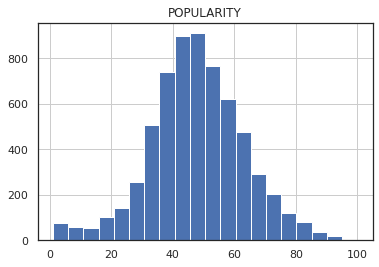

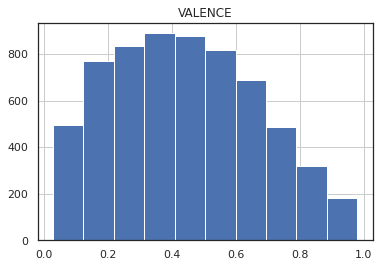

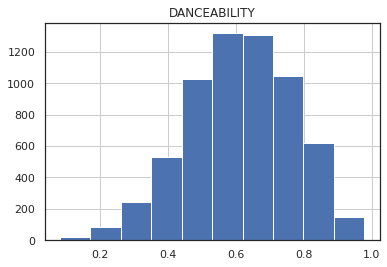

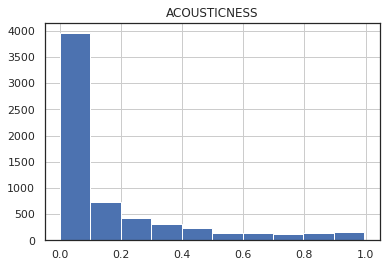

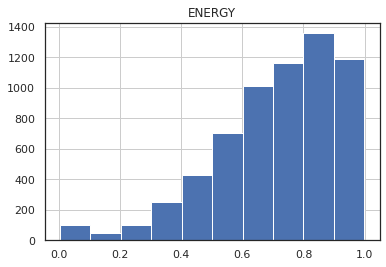

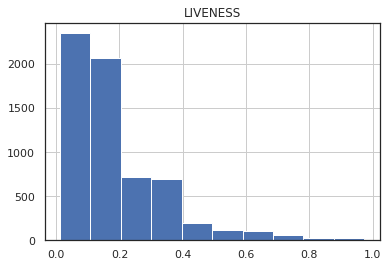

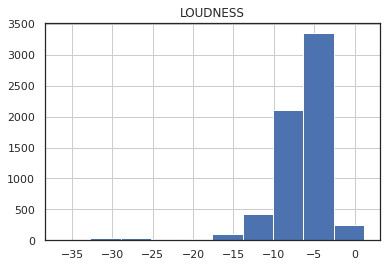

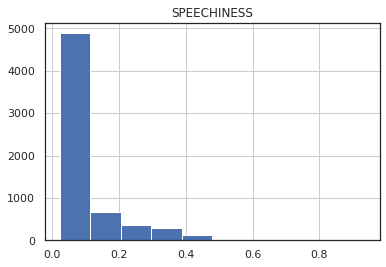

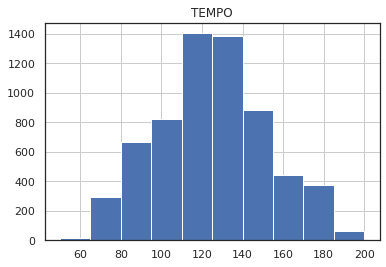

In [78]:
# code for display
df.popularity.hist(bins=20) 
plt.title('POPULARITY')
plt.show()
df.valence.hist(bins=10)
plt.title('VALENCE')
plt.show()
df.danceability.hist(bins=10)
plt.title('DANCEABILITY')
plt.show()
df.acousticness.hist(bins=10)
plt.title('ACOUSTICNESS')
plt.show()
df.energy.hist(bins=10)
plt.title('ENERGY')
plt.show()
df.liveness.hist(bins=10)
plt.title('LIVENESS')
plt.show()
df.loudness.hist(bins=10)
plt.title('LOUDNESS')
plt.show()
df.speechiness.hist(bins=10)
plt.title('SPEECHINESS')
plt.show()
df.tempo.hist(bins=10)
plt.title('TEMPO')
plt.show()

**4.4 Method 4**

#### **Operation name:** 
* Scatterplot(s) (ON DANCEABILITY w/ respect to fromAlbum)

#### **Reason for doing this:** 

* View relationships between some attributes we hypothesize will be relevant to danceability with some attention to fromAlbum (coloring) because the option is available to us; look for correlation or outstanding patterns.

#### **Outcome:** 

* We see a correlation with valence and danceability.
* We see a correlation with danceability and energy, but a different pattern. This is a signal for further exploration.
* Danceability and loudness are not inherently linked.
* Danceability and acousticness are not inherently linked.
* Danceability and popularity are not inherently linked.

* fromAlbum has gained scrutiny, at least in terms of danceability. We see no patterns in color. Our next method will explore the salience of fromAlbum across our range of features to determine if it is relevant at all.



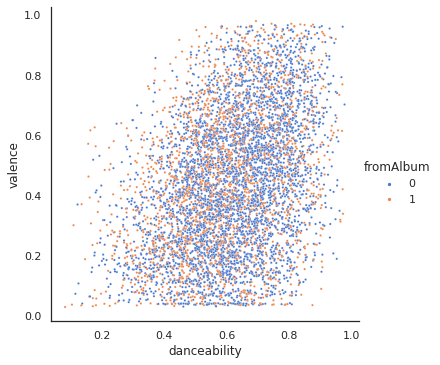

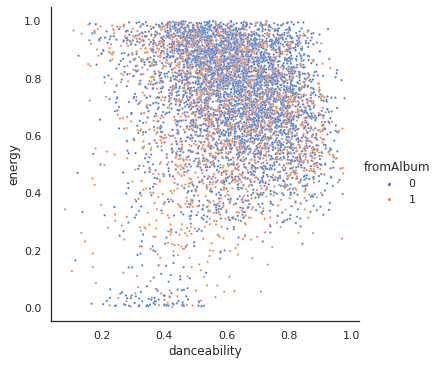

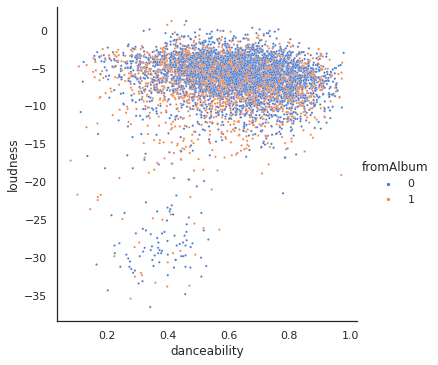

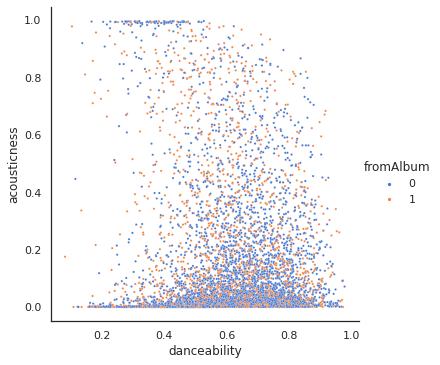

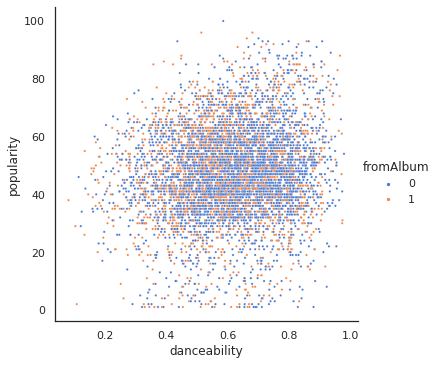

In [79]:
# code for display
sb.set_theme(style = "white")
sb.relplot(data=df, x="danceability", y="valence", hue="fromAlbum", palette="muted", size="fromAlbum", sizes=(5,5), height=5, alpha=1)
plt.show()
sb.relplot(data=df, x="danceability", y="energy", hue="fromAlbum", palette="muted", size="fromAlbum", sizes=(5,5), height=5, alpha=1)
plt.show()
sb.relplot(data=df, x="danceability", y="loudness", hue="fromAlbum", palette="muted", size="fromAlbum", sizes=(5,5), height=5, alpha=1)
plt.show()
sb.relplot(data=df, x="danceability", y="acousticness", hue="fromAlbum", palette="muted", size="fromAlbum", sizes=(5,5), height=5, alpha=1)
plt.show()
sb.relplot(data=df, x="danceability", y="popularity", hue="fromAlbum", palette="muted", size="fromAlbum", sizes=(5,5), height=5, alpha=1)
plt.show()

**4.5 Method 5**

#### **Operation name:**

* Probability Density Function (on fromAlbum & mode)

#### **Reason for doing this:**

* We want to know if a track being from an Album or being a single release means *anything* significant in relation to other features. We are looking for a lack of overlap in our visualizations. We are performing this step because Method 4 showed no clear indication that a track being from an album or being a single has any bearing on other features. It is important that we rectify this before moving onto analysis.

* Same as above, but also for mode.

#### **Outcome:**

* fromAlbum looks to be less useful than we initially thought, so we are doing one more than the required amount of methods. We observe full overlaps in nearly every feature, even those not pictured below. Due to this outcome, no analysis will be conducted on the fromAlbum feature.

* We performed the same check on mode using PDF. mode is also not useful and we can be sure of it thanks to this method.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


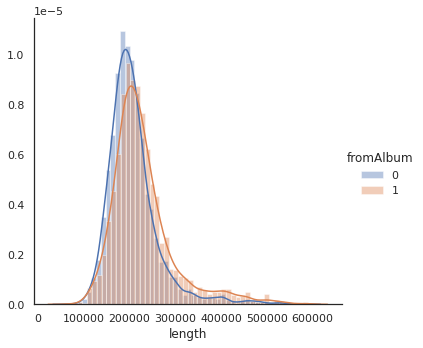

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


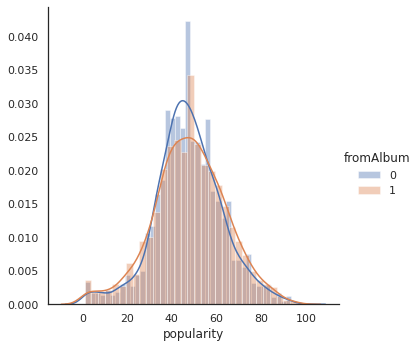

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


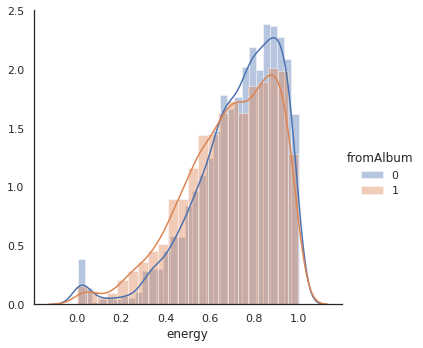

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


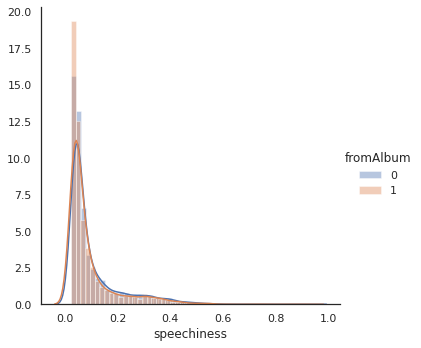

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


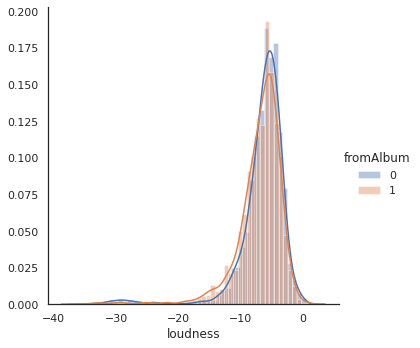

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


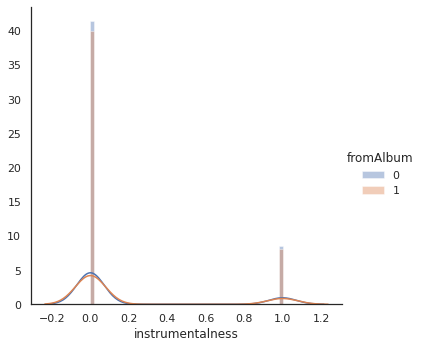

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


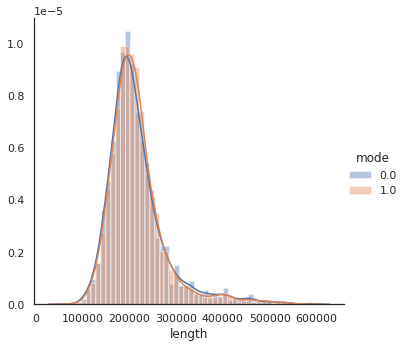

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


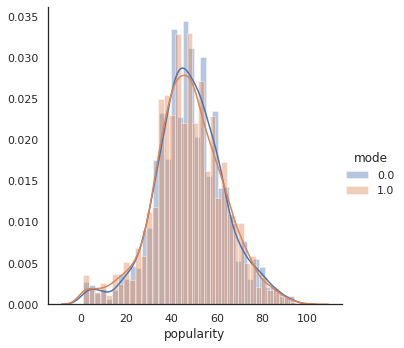

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


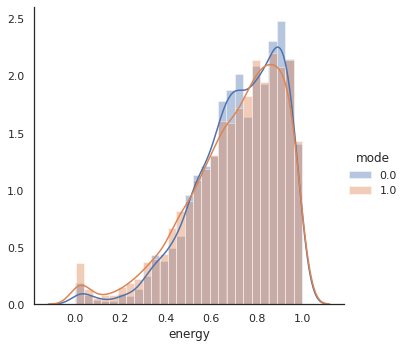

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


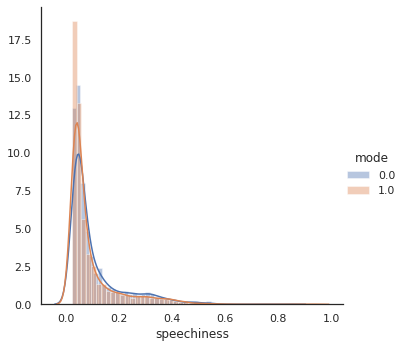

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


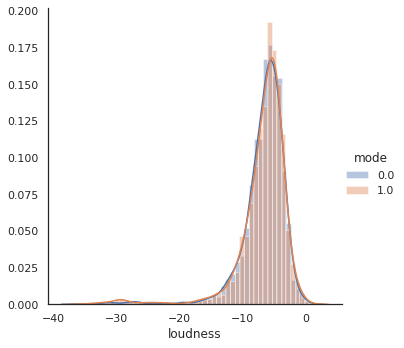

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


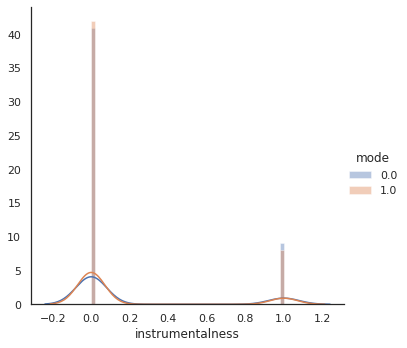

In [80]:
# code for display
sb.FacetGrid(df,hue="fromAlbum",height = 5).map(sb.distplot,"length").add_legend()
plt.show()
sb.FacetGrid(df,hue="fromAlbum",height = 5).map(sb.distplot,"popularity").add_legend()
plt.show()
sb.FacetGrid(df,hue="fromAlbum",height = 5).map(sb.distplot,"energy").add_legend()
plt.show()
sb.FacetGrid(df,hue="fromAlbum",height = 5).map(sb.distplot,"speechiness").add_legend()
plt.show()
sb.FacetGrid(df,hue="fromAlbum",height = 5).map(sb.distplot,"loudness").add_legend()
plt.show()
sb.FacetGrid(df,hue="fromAlbum",height = 5).map(sb.distplot,"instrumentalness").add_legend()
plt.show()

sb.FacetGrid(df,hue="mode",height = 5).map(sb.distplot,"length").add_legend()
plt.show()
sb.FacetGrid(df,hue="mode",height = 5).map(sb.distplot,"popularity").add_legend()
plt.show()
sb.FacetGrid(df,hue="mode",height = 5).map(sb.distplot,"energy").add_legend()
plt.show()
sb.FacetGrid(df,hue="mode",height = 5).map(sb.distplot,"speechiness").add_legend()
plt.show()
sb.FacetGrid(df,hue="mode",height = 5).map(sb.distplot,"loudness").add_legend()
plt.show()
sb.FacetGrid(df,hue="mode",height = 5).map(sb.distplot,"instrumentalness").add_legend()
plt.show()

**4.6 Method 6**

#### **Operation name:** 

* Correlation Matrix (ONLY POPULAR TRACKS)

#### **Reason for doing this:**

* Recruit the power of broad correlation search to hone in on patterns we can't see from our pair plots, with the added bonus of only looking at tracks that are greater than or equal to 66 out of 100 popularity, unlike our less informative pair plots from Method 2.

#### **Outcome:**

* It is worthwhile to analyze just our popular tracks based on the following correlations:

popularity -> (danceability)

valence -> (danceability, energy, loudness)

danceability -> (popularity, valence, acousticness, speechiness)

acousticness -> (energy, instrumentalness, loudness)

energy -> (valence, acousticness, instrumentalness, loudness)

instrumentalness -> (acousticness, instrumentalness, loudness

loudness -> (valence, danceability, acousticness, energy, instrumentalness, loudness)

speechiness -> (danceability)



In [81]:
# code for operation
from matplotlib.pyplot import *
pop = df
corr = pop[pop.popularity >= 66].corr()

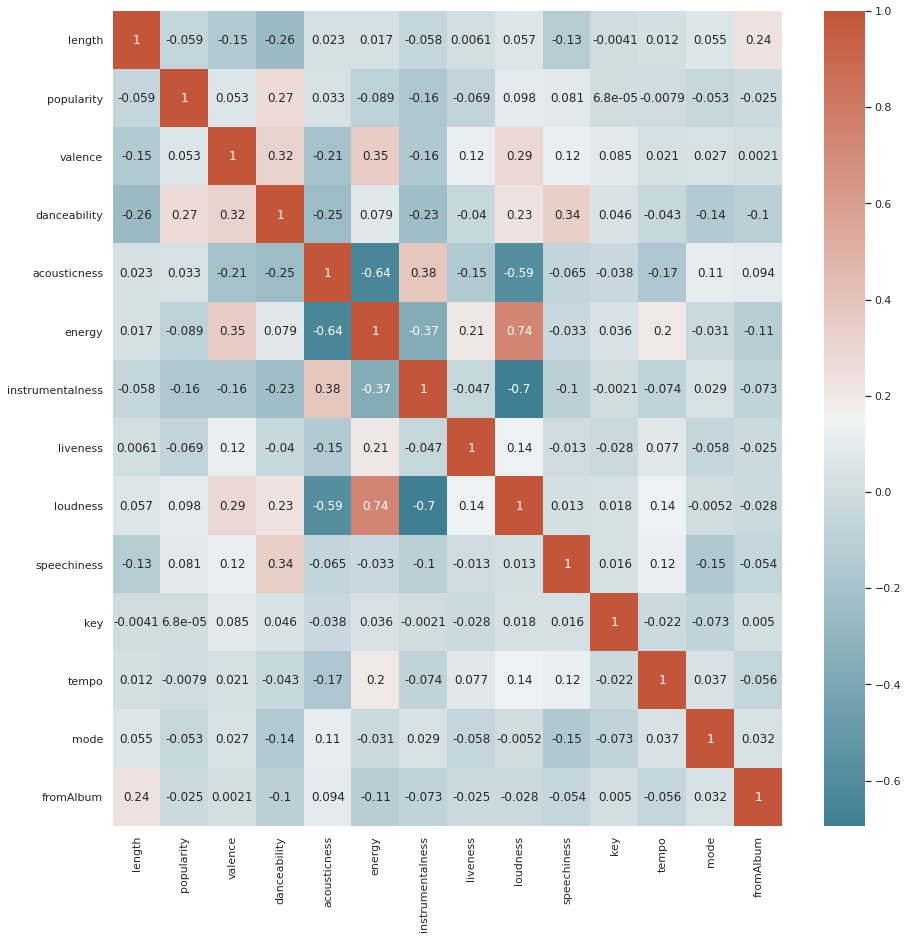

In [82]:
# code for display
plt.figure(figsize=(15,15))
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.diverging_palette(220, 20, as_cmap=True), ax=subplot(111))

**4.7 Method 7**

#### **Operation name:**

* Cat (Box) Plot (ONLY MOST POPULAR TRACKS ON SEASONS)

#### **Reason for doing this:**

* It's time to test the first hypothesis. Is Summer the time for dancing and energy? Is there a link between release_date of a very popular (80+) track and how spotify perceives its characteristics?

* While we're on boxplots, we can explore other features in relation to our seasons.

#### **Outcome:**

* Summer is clearly linked with higher danceability.

* Valence and energy do not seem to have a link with Summer, but energy looks to be slightly higher in the Winter.

* Keys seem to skew based on the season of release. This is a surprising discovery that warrants more exploration into the psychology of seasons.

* The Spring season sees an overall lower range of tempo, and a higher overall range of acousticness, followed closely by Summer for the same attribute. The median values for tempo and acousticness are consistent with respect to their seasons.

In [83]:
# code for operation

pop = df
pop['seasons'] = pop.release_date.dt.month%12 // 3 + 1 # 1:winter, 2:spring, 3:summer, 4:fall
pop = pop[pop.popularity >= 80]
#print(pop.head(5))
binInterval = [0,1,2,3,4]
binLabels = ["winter", "spring", "summer", "fall"]
pop['seasons'] = pd.cut(pop['seasons'], bins = binInterval, labels=binLabels)
#pop.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


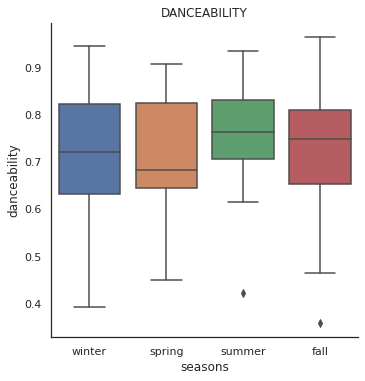

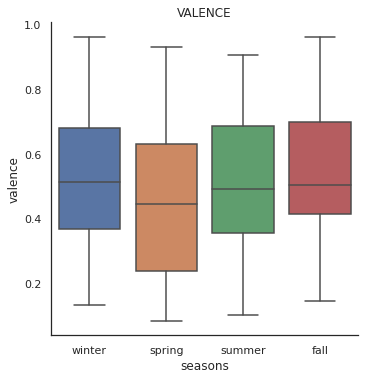

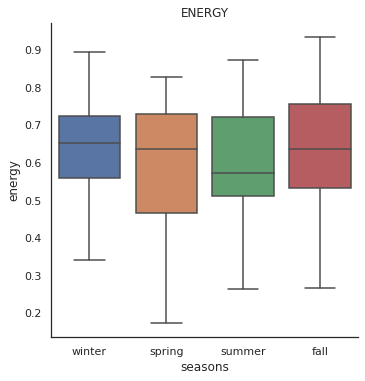

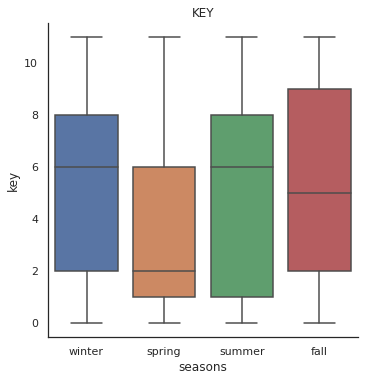

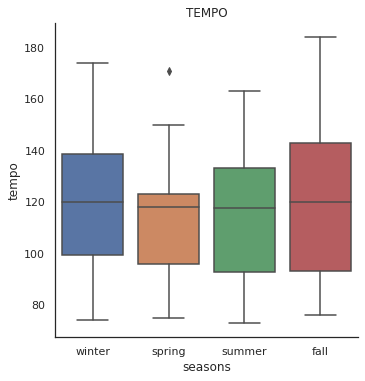

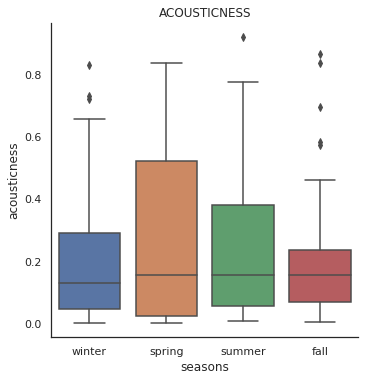

In [84]:
# code for display

sb.catplot(x="seasons", y="danceability", kind="box", data=pop)
plt.title('DANCEABILITY')
plt.show()

sb.catplot(x="seasons", y="valence", kind="box", data=pop)
plt.title('VALENCE')
plt.show()

sb.catplot(x="seasons", y="energy", kind="box", data=pop)
plt.title('ENERGY')
plt.show()

sb.catplot(x="seasons", y="key", kind="box", data=pop)
plt.title('KEY')
plt.show()

sb.catplot(x="seasons", y="tempo", kind="box", data=pop)
plt.title('TEMPO')
plt.show()

sb.catplot(x="seasons", y="acousticness", kind="box", data=pop)
plt.title('ACOUSTICNESS')
plt.show()

**4.8 Method 8**

#### **Operation name:**

* Scatterplot(s) (ONLY POPULAR TRACKS ON ENERGY)

#### **Reason for doing this:**

**CONTEXT** -

* We performed some scatterplots on danceability in an earlier method. While we received some useful information, our main achievements in that method were both getting a hint that fromAlbum has no importance, and that danceability does have *some* relevance to other features.

* In another, earlier method, we switched gears toward more popular tracks. At the end of the day, our problem is geared toward attaining information about what makes a track commercially successful. We performed the later half of our methods on very popular tracks and continued with that mindset.

**REASON** -

* In this method, we are viewing scatterplots again but for energy. We do this only on popular tracks.

* We are intentionally choosing the attributes based on our popular tracks correlations with energy.

#### **Outcome:**

* Valence increases with energy. This may be due to upbeat tracks having more "uplifting" energy. This brings us to want to explore deeper.

* We see a downslope in energy as acousticness increases. It is a subtle pattern for the most part until you turn your attention to the cluster of our most acoustic points (top left). They are the lowest energy tracks on the graph. 

* We understand that our instrumental tracks are at a great disadvantage to the non-instrumental tracks. At the same time, we had to explore this to satisfy our curiosity. For some reason, the least energetic tracks are at the border of if a track is considered instrumental or not. If there were nothing to this comparison, the points would be spread out further apart, but we have a gap and a rogue set of high energy, instrumental tracks (top right). We don't know what to make of this but it will not be ignored.

* We see slight upticks in energy as loudness increases. A line can be drawn. This correlation becomes less interesting when considering that a track's loudness is often decided by the mixing/mastering engineer and not the artist (unless they are the same), but it still gives us an insight because spotify may consider loudness in its calculation for energy. This would not be apparent without this method.


In [85]:
# code for operation
pop = df
pop = pop[pop.popularity >= 66]


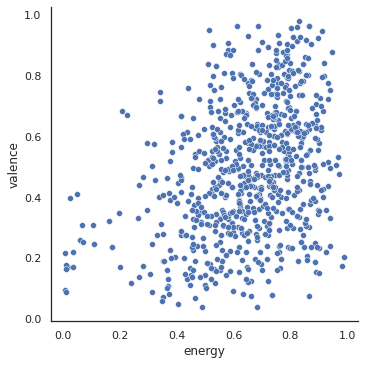

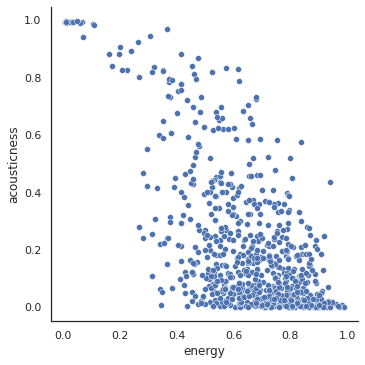

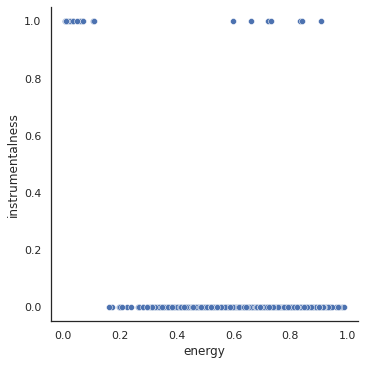

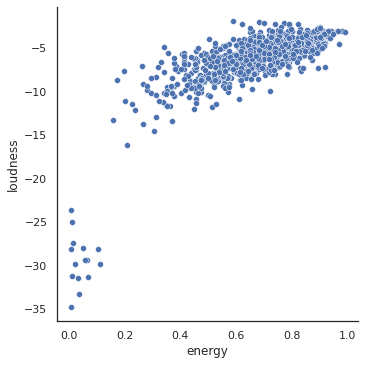

In [86]:
# code for display

sb.relplot(data=pop, x="energy", y="valence", palette="hls", sizes=(5,5), height=5, alpha=1)
plt.show()

sb.relplot(data=pop, x="energy", y="acousticness", palette="hls", sizes=(5,5), height=5, alpha=1)
plt.show()

sb.relplot(data=pop, x="energy", y="instrumentalness", palette="hls", sizes=(2,2), height=5, alpha=1)
plt.show()

sb.relplot(data=pop, x="energy", y="loudness", palette="hls", sizes=(5,5), height=5, alpha=1)
plt.show()



**4.9 Method 9**

#### **Operation name:**

* Release Date Exploration (Everything vs. Popular (80+))

#### **Reason for doing this:**

* Now we will employ multiple different methods at the same time to understand our dates. What is significant about *when* a track is released?

#### **Outcome:**

* release_date YEAR: 

  * All: We see an overwhelming bias toward recent releases. Recent tracks garner more listens. Older tracks tend to be forgotten. The older tracks on our list must be "throwbacks" or timeless as a matter of the curators' opinion.
  * Popular: We've observed that more popular tracks came from the previous year (2020). While we knew that popularity grows over time, this observation hints to us that popularity is something that isn't fully developed very quickly because we were barely into the year (2021) when we attained this dataset. We also realize that there aren't as many tracks in 2021 compared to 2020 in general, but the first histogram tells us that more 2021 tracks are on the curated lists. Therefore, we confirm that popularity is developed over the span of many months, and it may never stop changing over the existence of a track.

* release_date MONTH: 

  * All: Beginning and End months see the most releases. Slight bias toward January.
  * Popular: A higher rate of tracks that are popular were released closer to the end of last year. For context, a  lot of artists rush release their music at the end of the year to qualify for that year. This gives artists time to develop and refine their track up until the last moment. This gives them an advantage in ratings.


In [87]:
# code for operation
pop = df
pop = pop[pop.popularity >= 80]

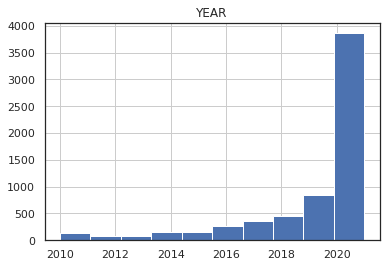

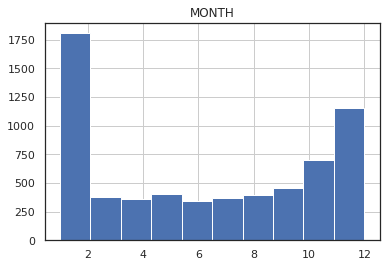

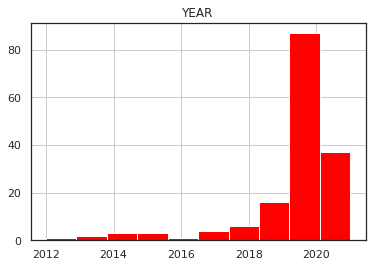

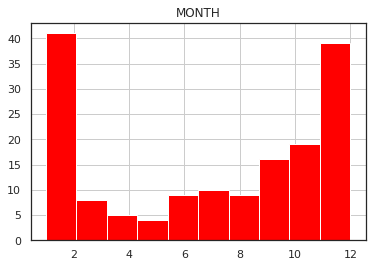

In [88]:
# code for display
df.release_date.dt.year.hist()
plt.title('YEAR')
plt.show()
df.release_date.dt.month.hist()
plt.title('MONTH')
plt.show()


pop.release_date.dt.year.hist(color='red')
plt.title('YEAR')
plt.show()
pop.release_date.dt.month.hist(color='red')
plt.title('MONTH')
plt.show()


**4.10 Method 10**

#### **Operation name:**

* Length Exploration

#### **Reason for doing this:**

* Until now, we have left length alone, saving it for its own analysis. 

* How long is a typical track? How long should it be?

#### **Outcome:**

* The most popular range of length for a track in general is in the range of 2-3 minutes.

* We already cleaned our data for tracks under one minute, and 1-2 minute tracks are rare regardless. We notice a steep decrease in the range of our popularities as time exceeds 6 minutes meaning the chance of a track becoming popular decreases as length increases.

* After observing several correlations between length and other attributes, we determined that the length hardly relates to any other aspect of the data *except* for popularity, where we noticed that absolutely no popular tracks (80+) exceed 5 minutes. Popularity's median peaks in the 2-4 minute zone and slightly decreases for tracks greater than 4 minutes until we reach a flucuation after 8 minutes.  

* There is no need to analyze length further. We will suggest that keeping the track under 5 minutes is for the best in terms of popularity.

In [89]:
# code for operation
pop = df
pop = pop[pop.popularity >= 80]
lengthms = df
lengthcat = df
lengthfullmin = df
lengthcat['length'] = lengthcat['length'].div(60000).round(1)
lengthfullmin['length'] = lengthcat['length'].round()
#print(lengthcat.head(5))

lengthmspop = pop
lengthcatpop = pop
lengthfullminpop = pop
lengthcatpop['length'] = lengthcatpop['length'].div(60000).round(1)
#print(lengthcat.head(5))
lengthfullminpop['length'] = lengthcat['length'].round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


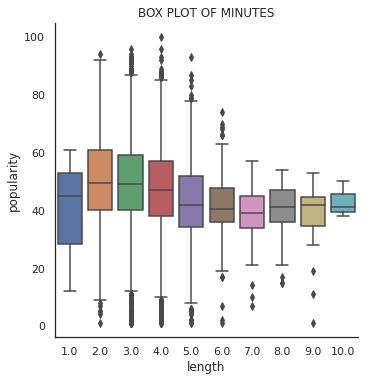

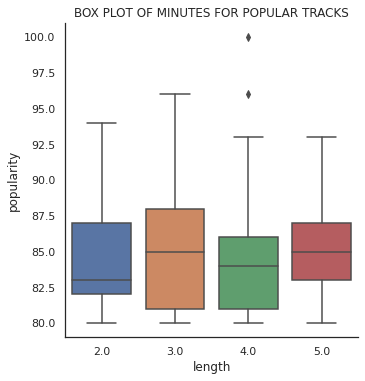

In [90]:
# code for display
sb.catplot(x="length", y="popularity", kind="box", data=lengthfullmin)
plt.title('BOX PLOT OF MINUTES')
plt.show()

sb.catplot(x="length", y="popularity", kind="box", data=lengthfullminpop)
plt.title('BOX PLOT OF MINUTES FOR POPULAR TRACKS')
plt.show()

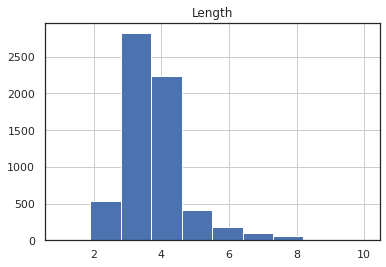

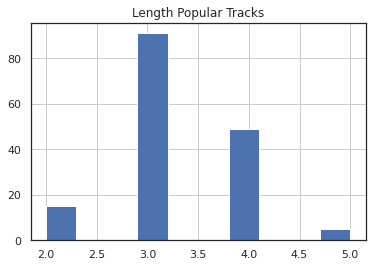

In [91]:
# code for display
lengthms.length.hist() 
plt.title('Length')
plt.show()

lengthmspop.length.hist() 
plt.title('Length Popular Tracks')
plt.show()


**4.11 Method 11**

#### **Operation name:**

* Time Plot (Attribute by Month for ALL TRACKS)

#### **Reason for doing this:**

* We are still curious about features with respect to time. We want to plot averages of our features with respect to the month of release of a track to further discover trends  within our data that artists would be interested in.

#### **Outcome:**

* We scaled our graphs to similar ranges of 15 where activity is present so that it would be clearer to visualize.

* We see by the Popularity plot that averages hardly exceed a score of 50, with Novermber averaging the highest and the period between Fall and Winter is the most popular. A dip down to sub-45 occurs in the Spring. This is also the least busy time of the year according to our previous calculation.

* Valence also dips in the Spring and at the beginning of Fall. It never quite reaches 50 on average, but we can be certain that the most valent tracks occur in the time after the New Year, and the peak of Summer (July).

* Energy looks rather consistent, given that we scaled everything appropriately. Energy average is always high above 70 and sees its only visible dip around the Winter time.

In [92]:
# code for operation
monthly_avg_pop=df.groupby(df.release_date.dt.month).popularity.mean()
monthly_avg_val=df.groupby(df.release_date.dt.month).valence.mean()
monthly_avg_ene=df.groupby(df.release_date.dt.month).energy.mean()

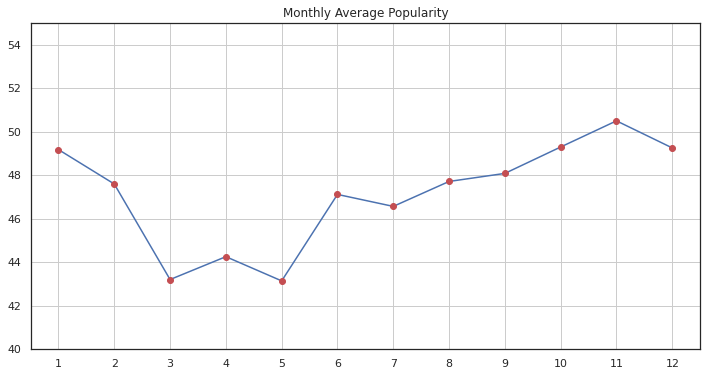

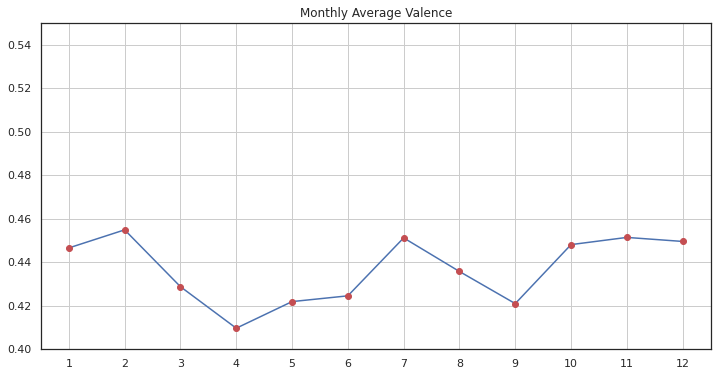

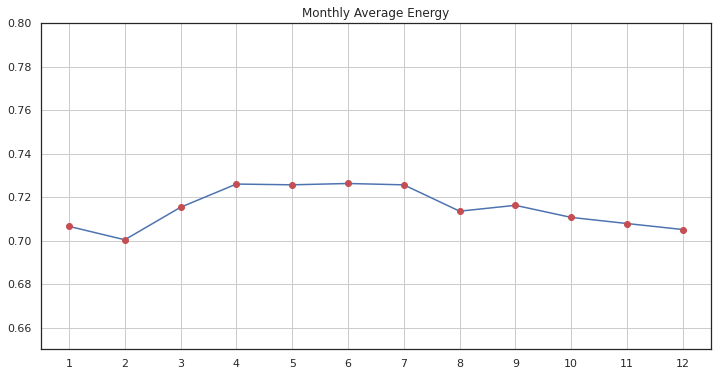

In [93]:
# code for display
plt.subplots(figsize=(12, 6))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlim(0.5,12.5)
plt.ylim(40,55)
plt.grid(b=True)
plot(monthly_avg_pop)
plot(monthly_avg_pop, 'bo', color = 'r')
plt.title('Monthly Average Popularity')
plt.show()


plt.subplots(figsize=(12, 6))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlim(0.5,12.5)
plt.ylim(0.4,0.55)
plt.grid(b=True)
plot(monthly_avg_val)
plot(monthly_avg_val, 'bo', color = 'r')
plt.title('Monthly Average Valence')
plt.show()

plt.subplots(figsize=(12, 6))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlim(0.5,12.5)
plt.ylim(0.65,.8)
plt.grid(b=True)
plot(monthly_avg_ene)
plot(monthly_avg_ene, 'bo', color = 'r')
plt.title('Monthly Average Energy')
plt.show()

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline
    5 – with 0-3 valid and non-repeating EDA operations;
    10 – with 4-8 valid and non-repeating EDA operations;
    15 – with 9 valid and non-repeating EDA operations;
    20 - with 10 valid and non-repeating EDA operations;
    25 - Completely master EDA and every step is perfect;
    
Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
